# MovieLens Data #

## Section A ##

## import modules ##

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Part 1 ##

# Load Data #

In [27]:
udata = pd.read_table('/home/user/Downloads/ml-100k/u.data',
                      header = None,
                      names = ['user id','item id','rating','timestamp'])

# Graph Plot #

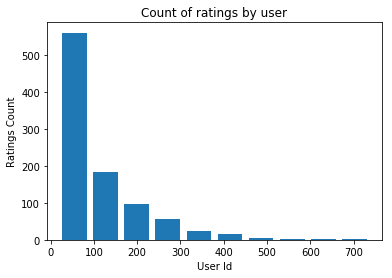

In [9]:
z = udata.groupby('user id').rating.count()
y = z.tolist()
plt.hist(y,histtype = 'bar',rwidth = 0.8)
plt.xlabel('User Id')
plt.ylabel('Ratings Count')
plt.title('Count of ratings by user')
plt.show()

## Part 2 ##

## Load Data ##

In [11]:
uuser = pd.read_csv('/home/user/Downloads/ml-100k/u.user',
                    sep = '|',header = None,
                    names = ['user id','age','gender','occupation','zip code'])

## Graph Plot ##

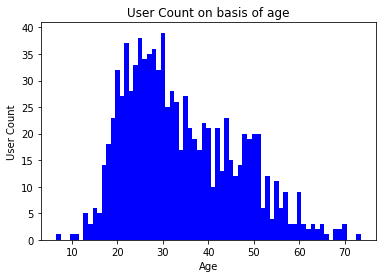

In [13]:
z = uuser.groupby(['age']).count()['user id']
x = list(z.index)
y = z.tolist()
plt.bar(x, y, 1, color = "b")
plt.ylabel('User Count')
plt.xlabel('Age')
plt.title('User Count on basis of age')
plt.show()

## Part 3 ##

## Load Data ##

In [28]:
uitem = pd.read_csv('/home/user/Downloads/ml-100k/u.item', 
        names = ['item id','movie title','release date','video release date','IMDb URL','unknown','Action',
               'Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film Noir',
               'Horror','Musical','Mystery','Romance','Sci Fi','Thriller','War','Western'],
                sep= '|', header = None, encoding = "ISO-8859-1")
uuser=pd.read_csv('/home/user/Downloads/ml-100k/u.user',sep = '|',
                  header = None,
                  names = ['user id','age','gender','occupation','zip code'])
udata=pd.read_table('/home/user/Downloads/ml-100k/u.data',
                    header = None,
                    names = ['user id','item id','rating','timestamp'])

## Drop Columns ##

In [29]:
uitem.drop(['movie title','release date','video release date','IMDb URL','unknown'], axis = 1,inplace = True)
uuser.drop(['age', 'occupation', 'zip code'], axis = 1,inplace = True)
udata.drop(['rating' , 'timestamp'], axis = 1,inplace = True)

## Merge Data ##

In [30]:
merge1 = udata.merge(uuser)
merge2 = merge1.merge(uitem)

## Graph Plot ##

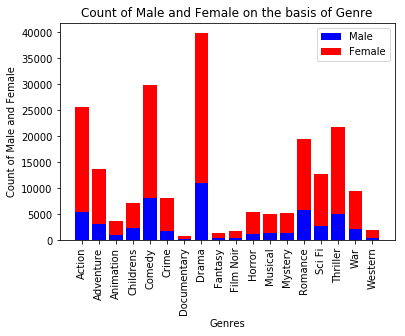

In [31]:
rows = ['Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
      'Fantasy', 'Film Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci Fi', 'Thriller', 'War', 'Western']
df = pd.DataFrame(index = rows, columns = ['M','F'])
for i in range(len(rows)):
    s=merge2.groupby('gender')[rows[i]].sum().tolist()
    df.loc[rows[i],'M'] = s[0]
    df.loc[rows[i],'F'] = s[1]   
X=range(len(rows))
Male = df.M.tolist()
Female = df.F.tolist()
plt.bar(X,Male , color = 'b',label = 'Male')
plt.bar(X,Female , color = 'r', bottom = Male,label = 'Female')
plt.xticks(X,tuple(rows),rotation = 'vertical')
plt.xlabel('Genres')
plt.ylabel('Count of Male and Female')
plt.title('Count of Male and Female on the basis of Genre')
plt.legend()
plt.show()  
    